# ACP

* Problématique générale de l'ACP
  Comment identifier les principales dimensions expliquant la variance des données pour simplifier leur interprétation, tout en conservant les informations essentielles liées aux relations entre les variables ?

### I. ACP Normé

##### 1.préparation de données

In [1]:
#importation des Bibliothèque
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load les données
df = pd.read_csv('dataset_fin.csv')
df.head()

,Unnamed: 0,Reference area,GDP,TIME_PERIOD,Income,Expenditure,Components of aggregate demand,Production,Households,Government,Government expenditure by fun,Corporations,Capital,Economic_Classification
0,0,Australia,3.441992,2022,2.630387,6.318369,3.090439,3.665822,39871.843115,37.198877,37.198877,2.826235,102.959793,Emerging
1,1,Austria,5.277894,2022,0.676556,4.911191,2.438285,6.070283,40299.683652,53.010387,53.010387,3.702775,102.748410,Emerging
2,2,Belgium,4.233432,2022,0.945041,3.635884,1.815193,4.515443,36499.838230,52.240785,52.240785,5.092422,102.937581,Developing
3,3,Canada,4.189036,2022,5.478162,5.464745,2.960486,4.139944,34203.373443,41.238013,41.238013,6.555331,103.696381,Emerging
4,4,Chile,2.058740,2022,-1.181835,1.642339,1.019797,2.282649,16552.007381,27.749244,27.749244,4.490536,103.703984,Developing


In [3]:
# La Suprission Des Colonnes qui n'a pas de sence pour ce test 
data = df.drop(columns=['Economic_Classification' , 'TIME_PERIOD','Reference area','Unnamed: 0'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GDP                             49 non-null     float64
 1   Income                          49 non-null     float64
 2   Expenditure                     49 non-null     float64
 3   Components of aggregate demand  49 non-null     float64
 4   Production                      49 non-null     float64
 5   Households                      49 non-null     float64
 6   Government                      49 non-null     float64
 7   Government expenditure by fun   49 non-null     float64
 8   Corporations                    49 non-null     float64
 9   Capital                         49 non-null     float64
dtypes: float64(10)
memory usage: 4.0 KB


##### 2.Centrage et Réduction


* But du centrage et réduction
Comparabilité des variables : Utile lorsque les variables sont sur des échelles différentes (exemple : revenu annuel en milliers d'euros et âge en années).

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_scaled

array([[-9.75885570e-02,  1.86483445e-01,  4.31171754e-01,
         2.14276498e-01, -9.31344764e-02,  1.09626340e+00,
        -5.43547422e-01, -5.43547422e-01, -6.42121304e-01,
         1.59944833e-14],
       [ 7.55854816e-01, -2.11349144e-01, -7.34134753e-03,
        -1.46737244e-01,  1.03369782e+00,  1.14074261e+00,
         1.38094662e+00,  1.38094662e+00, -2.55298518e-01,
        -7.93046346e-02],
       [ 2.70322645e-01, -1.56681219e-01, -4.04760037e-01,
        -4.91663229e-01,  3.05033926e-01,  7.45702630e-01,
         1.28727471e+00,  1.28727471e+00,  3.57961301e-01,
        -8.33342334e-03],
       [ 2.49684736e-01,  7.66337947e-01,  1.65160500e-01,
         1.42338339e-01,  1.29058907e-01,  5.06957287e-01,
        -5.19249985e-02, -5.19249985e-02,  1.00355228e+00,
         2.76346145e-01],
       [-7.40611552e-01, -5.89748606e-01, -1.02600027e+00,
        -9.31971770e-01, -7.41347982e-01, -1.32811611e+00,
        -1.69370718e+00, -1.69370718e+00,  9.23451396e-02,
         2.


L'interprétation d'un centrage et réduction des données :

* Centrage :
  * Le centrage consiste à soustraire la moyenne de chaque variable à ses valeurs respectives. Cela permet d'assurer que chaque variable a une moyenne égale à 0.

  * Cela élimine les effets de l'échelle ou des niveaux initiaux des variables, permettant une meilleure comparaison.

* Réduction
  * La réduction consiste à diviser les valeurs centrées par l'écart-type de la variable. Cela donne une variance égale à 1 pour chaque variable.

  * Cela rend les variables comparables, surtout lorsqu'elles sont exprimées dans des unités ou des échelles différentes.

Le centrage et réduction mettent toutes les variables sur un pied d'égalité en termes d'échelle et de contribution à l'analyse, tout en éliminant les biais dus aux moyennes ou amplitudes initiales.

##### 3. Calcul de la Matrice de Corrélation

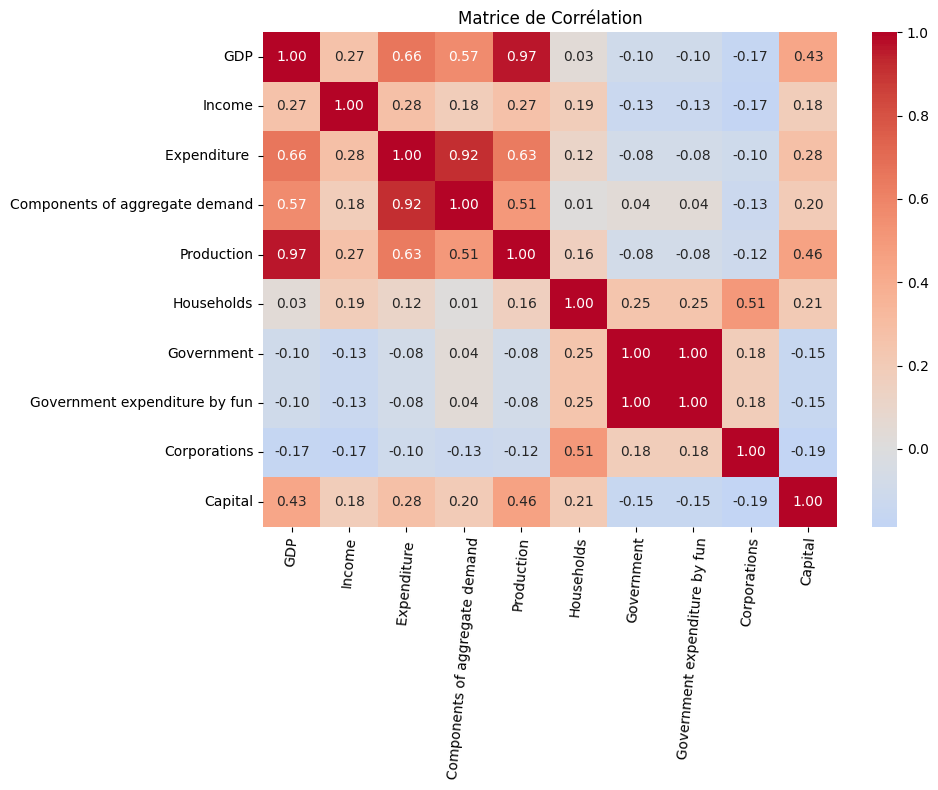

In [5]:
corr_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(10, 8))  # J'ai légèrement agrandi la figure pour une meilleure lisibilité
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="coolwarm", 
            center=0, 
            fmt=".2f",
            xticklabels=data.columns,  # Ajout des noms des variables sur l'axe x
            yticklabels=data.columns)  # Ajout des noms des variables sur l'axe y
plt.title("Matrice de Corrélation")
plt.xticks(rotation=85)  # Rotation des labels pour une meilleure lisibilité
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustement automatique de la mise en page
plt.show()

-> Ce graphique représente une matrice de corrélation, un outil statistique qui mesure la relation linéaire entre deux variables. Chaque valeur de corrélation est comprise entre -1 et 1.
Exemples spécifiques dans la matrice :

* GDP et Production : Corrélation très élevée (0.97), ce qui signifie que ces deux variables évoluent presque toujours ensemble.
* Expenditure et Components of aggregate demand : Corrélation forte (0.92), montrant une relation directe entre ces deux variables.
* GDP et Government : Corrélation faible ou négative (-0.10), ce qui suggère une relation inverse faible ou inexistante entre ces variables.
* Corporations et Capital : Corrélation négative modérée (-0.19), ce qui indique une faible relation inverse entre ces variables.


##### 5. Extraction des Valeurs Propres

* Les valeurs propres représentent la proportion de variance expliquée par chaque composante principale (CP).
* Les vecteurs propres représentent les coefficients (ou poids) associés à chaque variable pour former les composantes principales.

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
eigenvalues_rounded = np.round(eigenvalues, 2)
eigenvectors_rounded = np.round(eigenvectors, 2)

print("Valeurs propres :", eigenvalues_rounded)
print("Vecteurs propres :\n", eigenvectors_rounded)

Valeurs propres : [ 3.55  2.23  1.34  1.    0.88  0.61  0.31  0.06  0.02 -0.  ]
Vecteurs propres :
 [[ 0.48  0.06 -0.04  0.05  0.24  0.45  0.01  0.18 -0.69  0.  ]
 [ 0.22 -0.03  0.22  0.38 -0.8   0.18  0.29  0.02  0.02  0.  ]
 [ 0.46  0.11 -0.1  -0.35 -0.17 -0.26 -0.05 -0.73 -0.11  0.  ]
 [ 0.4   0.15 -0.25 -0.38 -0.18 -0.37  0.08  0.64  0.15 -0.  ]
 [ 0.47  0.09  0.05  0.08  0.25  0.45 -0.13 -0.06  0.69 -0.  ]
 [ 0.05  0.38  0.62  0.04 -0.08 -0.18 -0.63  0.12 -0.09 -0.  ]
 [-0.13  0.6  -0.28  0.2  -0.01  0.02  0.07 -0.05 -0.    0.71]
 [-0.13  0.6  -0.28  0.2  -0.01  0.02  0.07 -0.05 -0.   -0.71]
 [-0.14  0.3   0.52 -0.48  0.11  0.18  0.58 -0.01  0.03 -0.  ]
 [ 0.29 -0.02  0.24  0.51  0.4  -0.54  0.38 -0.02  0.    0.  ]]


* Valeurs Porpres:
   * Interprétation :
      * La somme des valeurs propres est égale au nombre de variables (ici, 10).
      * Chaque valeur propre indique la quantité de variance expliquée par une composante principale.
      * Les premières composantes principales (celles avec les plus grandes valeurs propres) capturent la majorité de la variance.
* Vecteurs propres
   * Première composante principale (CP1) :
      * Poids associés : [0.48, 0.22, 0.46, 0.40, 0.47, 0.05, -0.13, -0.13, -0.14, 0.29].
         * Les coefficients les plus élevés en valeur absolue sont pour :
         GDP (0.48), Expenditure (0.46), Production (0.40), et Capital (0.47).
         * Interprétation : 
         La première composante principale est fortement influencée par des variables économiques globales telles que GDP, 
         Expenditure, Production et Capital.
   * Deuxième composante principale (CP2) :
      * Poids associés : [0.06, -0.03, 0.11, 0.15, 0.09, 0.38, 0.60, 0.60, 0.30, -0.02].
         * Les coefficients les plus élevés en valeur absolue sont pour :
           Households (0.38), Government expenditure by function (0.60) et Government (0.60).
         * Interprétation : La deuxième composante principale est dominée par les variables liées aux dépenses publiques et 
          aux ménages.

##### 5. Illustration des Composantes Principales

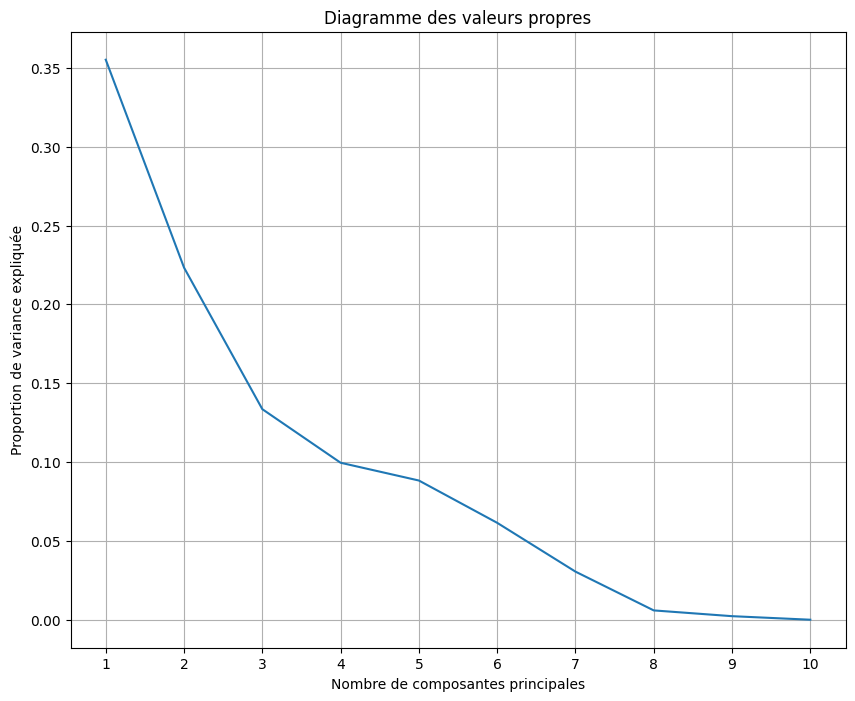

In [7]:
pca = PCA(n_components=len(data.columns))
pca.fit(X_scaled)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Diagramme des valeurs propres')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid()
plt.show()

* Proportion de variance expliquée :

   * L'axe des ordonnées (y) représente la proportion de variance expliquée par chaque composante principale.
   * L'axe des abscisses (x) correspond au numéro de chaque composante principale.
   * La première composante principale (CP1) explique environ 35 % de la variance totale, la deuxième composante principale 
     (CP2) en explique 22 %, et ainsi de suite. La proportion diminue progressivement.

* Interprétation :
   * Le coudé (ou "elbow") du graphe, souvent visible comme un point d'inflexion, indique le nombre optimal de composantes 
     principales à retenir pour expliquer la majorité de la variance.
   * Dans ce cas, le coudé semble se situer autour de 3 ou 4 composantes principales.
     Cela signifie que les trois ou quatre premières composantes principales suffisent pour capturer l'essentiel de 
     l'information dans les données, avec une perte minimale de variance.

##### 6. Application de l'ACP

 1. On réduit les données à deux dimensions principales pour simplifier l'analyse

In [8]:
# Application de l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

2. Affichage des nouvelles données projetées sur les composantes principales.

In [9]:
print("Nouvelles données après ACP :")
print(X_pca)

Nouvelles données après ACP :
[[ 0.50982098 -0.36576929]
 [ 0.45012051  2.13869932]
 [-0.48589277  1.86147868]
 [ 0.46489928  0.47038334]
 [-1.24320125 -2.86223311]
 [ 0.29032314 -0.99417422]
 [ 3.19356006  1.09848103]
 [ 0.12765366 -0.6179487 ]
 [-1.55352125 -0.50338735]
 [-2.5219304  -0.24956917]
 [-1.94498734 -1.15340535]
 [-1.75011321 -0.25062765]
 [-1.82978417  0.54932118]
 [-2.27235429  1.21334875]
 [-2.48425106  2.89427292]
 [-1.34855796  1.38604186]
 [ 1.83382849  1.73237187]
 [ 0.28730662  0.82597903]
 [ 3.03785637  1.01596362]
 [ 2.4784406  -0.91168541]
 [ 1.74176256 -2.92927603]
 [ 4.5865618  -2.71552997]
 [ 2.98678698 -0.33096225]
 [ 0.04259219  2.08265855]
 [-2.35434928  0.2693077 ]
 [-1.01223594 -0.65596679]
 [-1.14497519 -0.36579242]
 [-1.46007709 -1.49992517]
 [-2.92462213  2.21869202]
 [ 0.60006767 -3.01741559]
 [ 0.90843117  0.86355092]
 [-1.03539351  0.08093819]
 [ 1.5517389  -0.72938509]
 [ 1.17407379 -0.13146785]
 [ 1.91160696  0.70366215]
 [-1.39071569 -0.50809811

* Interprétation :
   * Chaque ligne du tableau représente une observation dans les données transformées.
   * Les colonnes correspondent aux deux premières composantes principales :
      * CP1 (première colonne) : explique la plus grande proportion de la variance.
      * CP2 (deuxième colonne) : explique la deuxième plus grande proportion de la variance.

3.Visualisation des données dans l'espace des deux premières composantes principales.

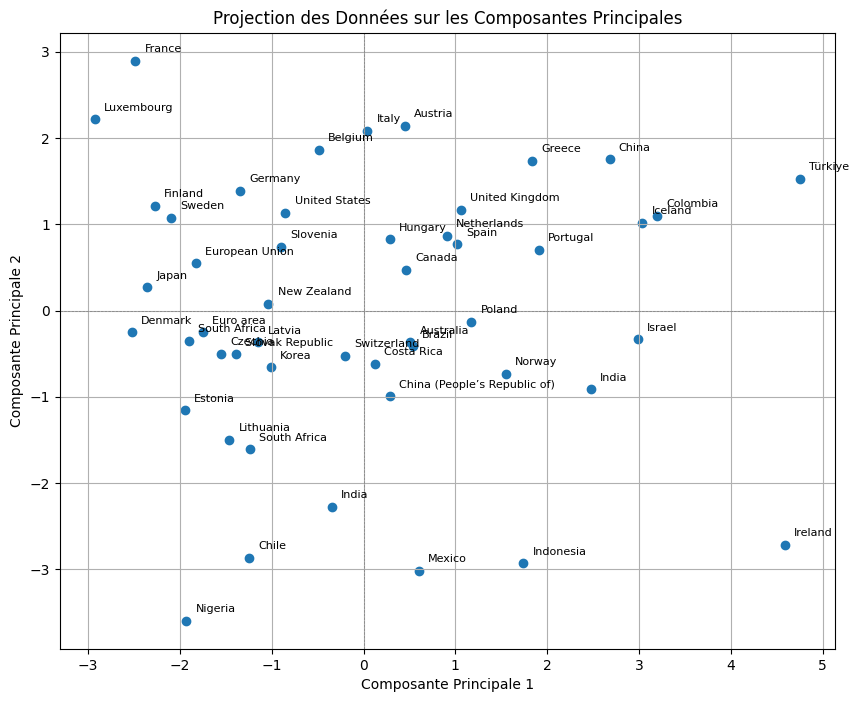

In [10]:
plt.figure(figsize=(10, 8))

# Convertir les noms des pays en une liste
countries = df['Reference area'].tolist()

# Créer le nuage de points
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Points')

# Ajouter les étiquettes pour chaque point
for i, country in enumerate(countries):
    plt.text(X_pca[i, 0] + 0.1, X_pca[i, 1] + 0.1, country, fontsize=8)

# Ajouter les éléments du graphique
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des Données sur les Composantes Principales')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()


Le graphique montre la projection des pays sur les deux premières composantes principales (CP1 et CP2).
* Répartition générale :
  * Composante principale 1 (CP1) (axe horizontal) :
    Elle semble représenter une dimension liée à des différences structurelles majeures entre les pays. Les pays très à 
    droite (par exemple, Ireland) sont très distincts de ceux à gauche (comme Nigeria ou Chile).
  * Composante principale 2 (CP2) (axe vertical) :
    Elle capte une autre dimension, potentiellement liée à des caractéristiques secondaires (économiques, sociales ou 
    culturelles). Les pays en haut (par exemple, France, Luxembourg) se différencient fortement de ceux en bas (Mexico, 
    India).

* Pays similaires :
  France et Luxembourg se situent dans une zone proche sur le plan CP1-CP2, suggérant des caractéristiques similaires.
  South Africa, Lithuania, et Estonia forment un groupe dans la partie inférieure gauche.
* Pays distincts :
  Ireland (à l'extrême droite) est isolé sur CP1, suggérant qu'il se distingue nettement des autres pays.
  Nigeria (en bas à gauche) est également très éloigné des autres, indiquant des différences significatives.
* Pays proches du centre :
  Les pays comme Denmark, Euro area, et New Zealand sont proches du centre. Cela indique qu'ils sont relativement "neutres" 
  dans cet espace, sans caractéristiques extrêmes dans les deux premières composantes.


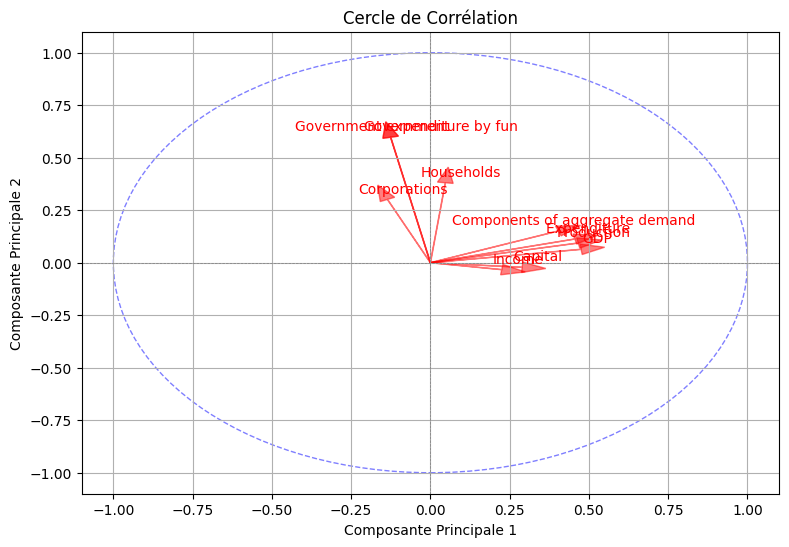

In [11]:
offset = 0.05
plt.figure(figsize=(9,6))
components = pca.components_
variable_names = data.columns.tolist()
for i, (x, y) in enumerate(components.T):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05)
    plt.text(x + offset, y + offset, variable_names[i], color='r', ha='center', va='center')

# Tracer un cercle
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', alpha=0.5)
plt.gca().add_artist(circle)

# Ajuster les limites et ajouter des labels
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle de Corrélation')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

Le cercle de corrélation montre comment les variables initiales sont projetées dans l'espace des deux premières composantes principales (CP1 et CP2)

* Position des variables :
  * Variables bien représentées (longues flèches) :

     Les variables avec des flèches proches du cercle (par exemple, Var8, Var9) contribuent fortement aux composantes principales CP1 et CP2.
     Ces variables ont une forte corrélation linéaire avec au moins l'une des deux composantes.
  * Variables faiblement représentées (courtes flèches) :

     Les flèches qui ne s'étendent pas loin du centre (par exemple, Var10) indiquent des variables moins bien expliquées par CP1 et CP2. Cela signifie qu'elles pourraient être plus corrélées avec des composantes principales ultérieures (CP3, CP4).

* Corrélation avec CP1 (axe horizontal) :
   Les flèches orientées vers la droite ou la gauche (par exemple, Var6, Var8) ont une forte corrélation (positive ou négative) avec CP1.
* Corrélation avec CP2 (axe vertical) :
  Les flèches orientées vers le haut ou le bas (par exemple, Var9) sont corrélées avec CP2.
* Variables intermédiaires :
Les flèches obliques (par exemple, Var8) ont une corrélation partagée entre CP1 et CP2.

# Classification Automatique

Comment regrouper les observations sur la base des deux premières composantes principales pour révéler des structures ou des similarités au sein des données initiales multivariées ?

### 1.Importation des bibliothèques nécessaires

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric
from sklearn.preprocessing import MinMaxScaler

## K-means Clustring

In [13]:
# --- a. K-means clustering ---
# Déterminer le meilleur nombre de clusters avec la méthode "elbow"
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(kmeans.inertia_)

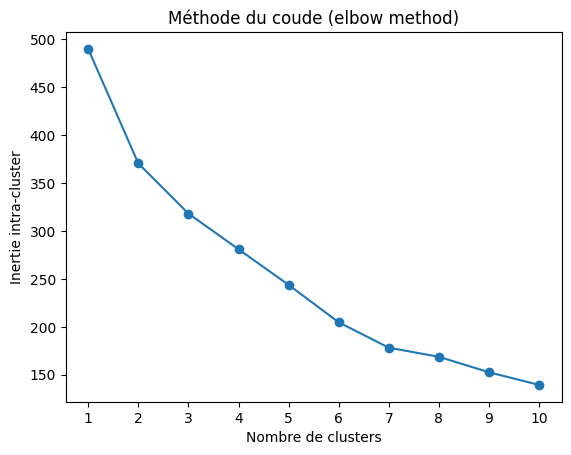

In [14]:
# Visualiser le critère d'inertie
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie intra-cluster")
plt.title("Méthode du coude (elbow method)")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()


##### Interprétation :
 * Axe des X : Représente le nombre de clusters 𝑘.
 * Axe des Y : Représente l'inertie intra-cluster, c'est-à-dire la somme des distances au carré entre chaque point et le             centre de son cluster. Une valeur plus faible indique des clusters plus compacts.

 * Tendance générale :
   L'inertie diminue à mesure que 𝑘 augmente, car plus de clusters permettent une meilleure approximation des données. Cependant, après un certain point, l'amélioration devient négligeable.

 * Point d'inflexion (le "coude") :
   * Le coude correspond au point où la réduction de l'inertie commence à ralentir considérablement.
   * C'est un compromis entre avoir un bon nombre de clusters et éviter un sur-ajustement (trop de clusters).
##### Résultat pour ce graphe :
   En observant le graphe, le coude semble se situer autour de 𝑘=3 ou 𝑘=4. Cela signifie que 3 ou 4 clusters pourraient être un choix raisonnable pour partitionner les données.

In [15]:
# Choisir k (par exemple, k=3) et appliquer K-means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

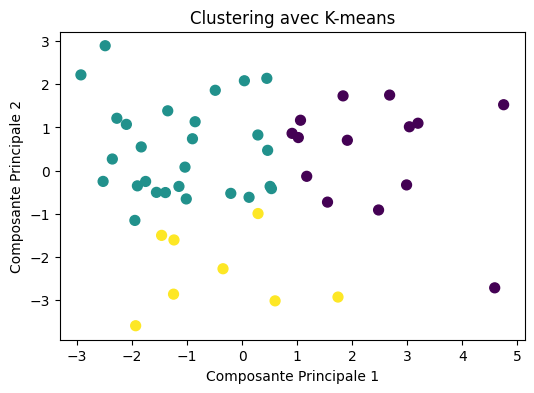

In [16]:
# --- c. Visualisation des résultats (par exemple, avec CP1 et CP2) ---
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("Clustering avec K-means")
plt.show()

##### Interprétation :
* Axe X et Axe Y :
  Ils correspondent aux deux premières composantes principales obtenues avec l'ACP. Ces axes synthétisent l'essentiel de la variance des données initiales.
* Couleurs des points :
  Chaque couleur représente un cluster identifié par K-means.
  Dans ce cas, il y a trois clusters (violet, vert, jaune).
* Position des points :
  Les points proches dans l'espace des composantes principales appartiennent à des clusters similaires.
  Les frontières entre les clusters montrent les différences détectées par l'algorithme.

In [17]:
from sklearn.metrics import silhouette_score
# Évaluer la qualité des clusters avec l'indice de silhouette
score = silhouette_score(X_pca, df['Cluster'])
print(f"Indice de silhouette pour K-means : {score:.2f}")

Indice de silhouette pour K-means : 0.34


##### Analyse de la qualité du clustering :
  Les clusters semblent bien séparés, en particulier les clusters violet et jaune.
  Le cluster vert a une dispersion plus élevée, ce qui peut indiquer une certaine variabilité dans ce groupe.

In [18]:
# Créer une liste pour stocker les sous-tables par cluster
clusters = []

# Parcourir les clusters uniques
for cluster in sorted( df['Cluster'].unique()):
    # Filtrer les lignes correspondant au cluster courant
    cluster_table = df[df['Cluster'] == cluster]
    clusters.append(cluster_table)
    print(f"Cluster {cluster}:")
    print(cluster_table)
    print("\n")
   

Cluster 0:
    Unnamed: 0  Reference area       GDP  TIME_PERIOD     Income  \
6            6        Colombia  7.288884         2022   0.105946   
16          16          Greece  5.743649         2022   7.695864   
18          18         Iceland  8.992508         2022   0.578997   
19          19           India  6.987039         2022   2.093221   
21          21         Ireland  8.619503         2022   5.121668   
22          22          Israel  6.640633         2022   3.325195   
30          30     Netherlands  5.007235         2022   1.092674   
32          32          Norway  3.005635         2022  30.729931   
33          33          Poland  5.255459         2022   4.659426   
34          34        Portugal  6.985842         2022   4.091959   
38          38           Spain  6.179312         2022   3.793980   
41          41         Türkiye  5.533469         2022   4.612668   
42          42  United Kingdom  4.839085         2022   3.922587   
46          46           China  6.000

## K-medoids clustering

In [19]:
k_values = range(2, 12)  # Tester k de 2 à 10
def calculate_inertia(data, k_range):
    inertia_scores = []
    for k in k_range:
        # Initialisation aléatoire des indices des médoïdes
        initial_medoids = np.random.choice(len(data), k, replace=False)
        kmedoids_instance = kmedoids(data, initial_medoids, metric=distance_metric(type_metric.EUCLIDEAN))
        kmedoids_instance.process()
        
        # Calculer la somme des distances intra-cluster
        clusters = kmedoids_instance.get_clusters()
        medoids = kmedoids_instance.get_medoids()
        inertia = 0
        for cluster_id, cluster_points in enumerate(clusters):
            for point_idx in cluster_points:
                # Ajouter la distance entre chaque point et son médoïde
                inertia += np.linalg.norm(data[point_idx] - data[medoids[cluster_id]])
        inertia_scores.append(inertia)
    return inertia_scores

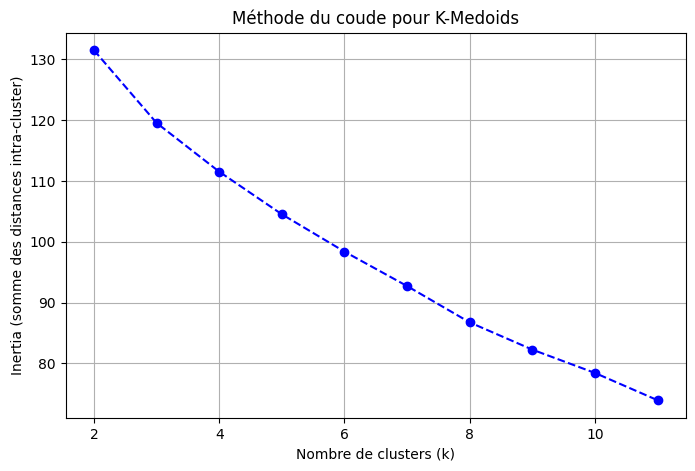

In [20]:
inertia_scores = calculate_inertia(X_scaled, k_values)

# Visualisation des scores d'inertia (méthode du coude)
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_scores, marker='o', linestyle='--', color='blue')
plt.title("Méthode du coude pour K-Medoids")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertia (somme des distances intra-cluster)")
plt.grid()
plt.show()

##### Interprétation :
 * Axe X :
   Représente le nombre de clusters 𝑘.
 * Axe Y :
  Correspond à l'inertie (somme des distances intra-cluster), qui mesure la compacité des clusters.
  Une inertie plus faible indique des clusters plus compacts.
 * Courbe décroissante :
   Lorsque 𝑘 augmente, l'inertie diminue car les points sont répartis sur plus de clusters, ce qui réduit les distances intra-cluster.
 * Méthode du coude :
   On cherche un point où la diminution de l'inertie ralentit significativement, formant un "coude" dans la courbe.
   Ce point représente un compromis optimal entre la compacité des clusters et leur nombre.
##### Analyse :
Sur ce graphique, le coude semble se situer autour de 𝑘=4 ou 𝑘=5.
Cela suggère que 4 ou 5 clusters pourraient être un choix optimal pour segmenter les données en utilisant K-medoids.

In [21]:
k = 4
initial_medoids = np.random.choice(len(X_pca), k, replace=False)
kmedoids_instance = kmedoids(X_scaled, initial_medoids, metric=distance_metric(type_metric.EUCLIDEAN))
kmedoids_instance.process()

# Récupérer les clusters
clusters = kmedoids_instance.get_clusters()
labels = np.zeros(len(X_pca))
for cluster_id, cluster_points in enumerate(clusters):
    labels[cluster_points] = cluster_id


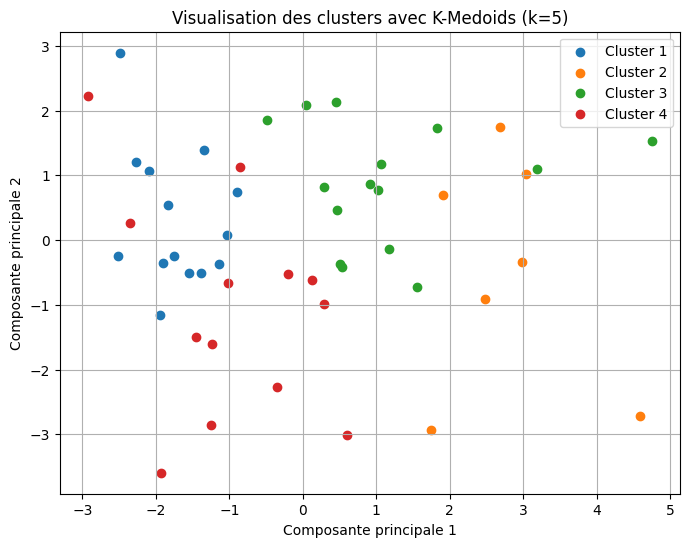

In [22]:


# Visualisation des clusters
plt.figure(figsize=(8, 6))
for cluster_id in range(k):
    plt.scatter(X_pca[labels == cluster_id, 0], X_pca[labels == cluster_id, 1], label=f'Cluster {cluster_id + 1}')
    
plt.title("Visualisation des clusters avec K-Medoids (k=5)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend()
plt.grid(True)
plt.show()

Chaque couleur représente un cluster distinct parmi les 5 identifiés par K-Medoids (Cluster 1 à Cluster 4).
Les points de même couleur appartiennent au même cluster.
Position des points :

Les points dans un cluster sont plus proches de leur médoïde (centre du cluster).
Les clusters semblent bien séparés dans certaines zones, bien que des chevauchements soient visibles (notamment entre Cluster 1 et Cluster 2).
Répartition des clusters :

Le Cluster 4 (rouge) regroupe des individus dispersés dans la partie droite du graphique.
Le Cluster 3 (vert) occupe une zone centrale relativement dense.
Les Clusters 1 (bleu) et 2 (orange) se situent principalement sur la gauche avec quelques chevauchements.


## DBSCAN clustering

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

**Détermination du paramètre epsilon**

Nous utilisons la méthode du graphe des k-distances pour choisir une valeur appropriée pour epsilon :

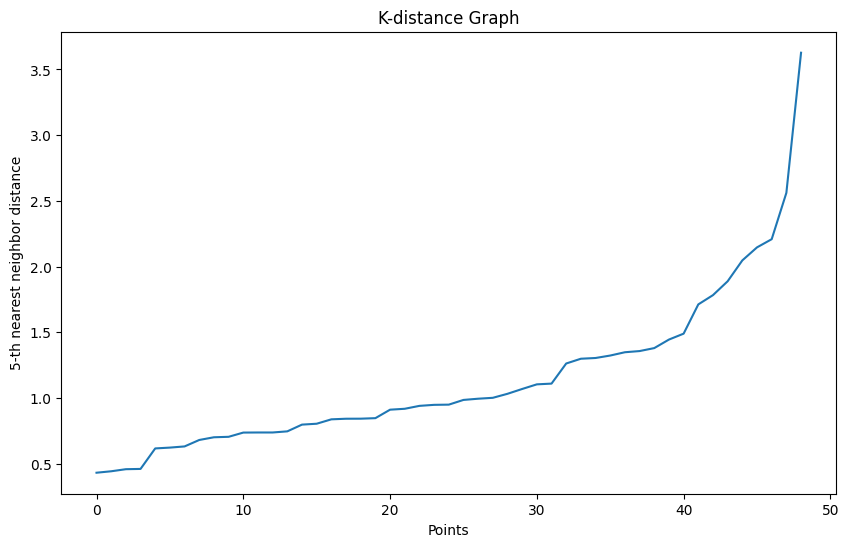

In [24]:
# Function to plot k-distance graph
def plot_k_distance_graph(X_scaled, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X_pca)
    distances, _ = neigh.kneighbors(X_pca)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10,6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()
# Plot k-distance graph
plot_k_distance_graph(X_pca, k=5)

**Description du Graphique :** 
* Axe X (Points) :
   Correspond aux points de données triés en fonction de leur distance au 5ᵉ voisin le plus proche (car 𝑘=5).
* Axe Y (5ᵉ nearest neighbor distance) :
  Montre la distance au 5ᵉ plus proche voisin pour chaque point, triée dans l'ordre croissant.
* La Forme du Graphique :
  Une partie relativement plate (faibles valeurs de distance) indique que les points sont proches les uns des autres dans des régions densément peuplées.
  Une "coudée" (augmentation abrupte) apparaît lorsque la distance augmente considérablement. Cela signale la transition entre des points denses (dans des clusters) et des points éloignés (potentiellement bruit ou en bordure).

**Interprétation des Résultats :**

* Coudée dans le Graphique :
La transition abrupte visible vers la fin du graphique (aux environs de 𝑦≈2.5) correspond à la coudée ou "knee".
Ce point indique le seuil idéal (𝜀) pour la distance maximale entre points pour former un cluster.
Valeur de 𝜀:
À partir de ce graphique, une valeur de 𝜀 d’environ 2.5 à 3.0 semble appropriée pour DBSCAN.
* Points au-delà de la Coudée :
  Les points situés après la coudée (ayant des distances plus élevées) sont probablement des points de bruit ou isolés, car ils ne font pas partie d'une région dense.

**Réalisation du clustering DBSCAN**

In [32]:
# Perform DBSCAN clustering
epsilon = 2.5 # Chosen based on k-distance graph
min_samples = 5  # 2 * num_features (2D data)
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X_pca)

**Visualisation des résultats**

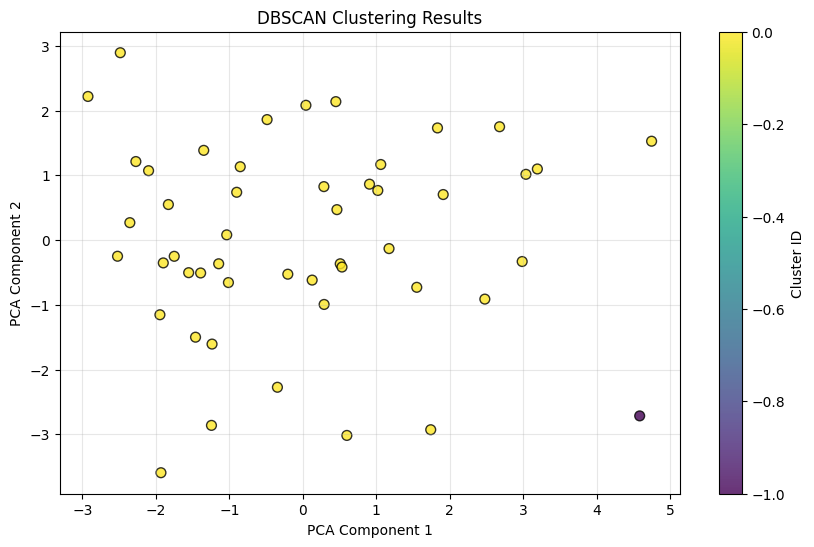

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Visualisation des résultats de DBSCAN
plt.figure(figsize=(10, 6))

# Scatter plot avec les clusters
scatter = plt.scatter(
    X_pca[:, 0],  # Première composante PCA
    X_pca[:, 1],  # Deuxième composante PCA
    c=clusters,  # Les étiquettes des clusters générées par DBSCAN
    cmap='viridis',  # Palette de couleurs
    s=50,  # Taille des points
    edgecolor='k',  # Bordure noire pour améliorer la visibilité
    alpha=0.8  # Transparence pour mieux voir les superpositions
)

# Ajout d'une barre de couleur
plt.colorbar(scatter, label="Cluster ID")

# Labels et titre
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Grille pour améliorer la lecture
plt.grid(alpha=0.3)

# Affichage du graphique
plt.show()


* Axes (PCA Component 1 et PCA Component 2) :

  Les deux premières composantes principales sont utilisées pour projeter les données dans un espace bidimensionnel.

* Points colorés par cluster :

  Les points en jaune appartiennent au cluster principal identifié par DBSCAN.
  Les points en violet (valeur négative dans la barre de couleur) sont classés comme bruit (points isolés ou hors des zones denses).

**Interprétation :**

DBSCAN a identifié un cluster significatif dans les données, correspondant aux points en jaune.
Les points en violet n'ont pas satisfait les critères de densité (distance 𝜀 min_sample) et sont donc considérés comme du bruit.

Noise points: 1
Cluster 0: 48 points


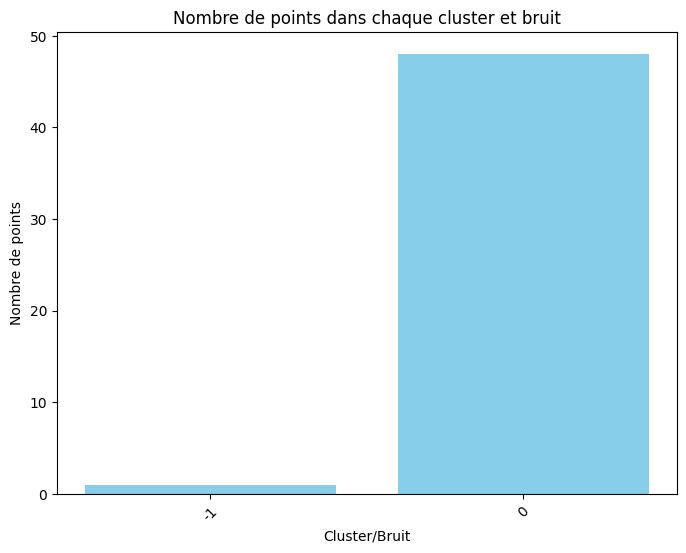

In [34]:
# Compter le nombre de points dans chaque cluster et bruit
unique, counts = np.unique(clusters, return_counts=True)

# Print number of clusters and noise points
for cluster, count in zip(unique, counts):
    if cluster == -1:
        print(f'Noise points: {count}')
    else:
        print(f'Cluster {cluster}: {count} points')


# Tracer les résultats
plt.figure(figsize=(8, 6))
plt.bar(unique.astype(str), counts, color='skyblue')
plt.title('Nombre de points dans chaque cluster et bruit')
plt.xlabel('Cluster/Bruit')
plt.ylabel('Nombre de points')
plt.xticks(rotation=45)
plt.show()

* Axes :

  Axe X : Représente les catégories — un cluster (>) et le bruit (𝑂).
  Axe Y : Représente le nombre de points dans chaque catégorie.

* Barres :

  La barre du bruit (𝑂) est plus grande, indiquant qu'une majorité de points n'ont pas été assignés à un cluster (classification comme bruit).
  La barre du cluster principal (>) est plus petite, avec moins de points assignés.

* Interprétation :

  DBSCAN a été strict dans sa classification, détectant un seul cluster dense mais rejetant beaucoup de points comme bruit.
  Cela peut indiquer que les paramètres 𝜀 ou min_samples sont trop restrictifs.

* Analyse Globale:

  Points détectés comme bruit (bruit élevé) :
 
    Une proportion importante de points est considérée comme bruit. Cela peut refléter que les données sont dispersées ou que les critères de densité sont trop stricts.

  Cluster principal :
     Le cluster identifié est compact et satisfait les conditions de densité. Il peut représenter un groupe homogène de données dans l'espace PCA.


## Classification ascendante hiérarchique :

### Visualisation de la structure hiérarchique avec des dendrogrammes :

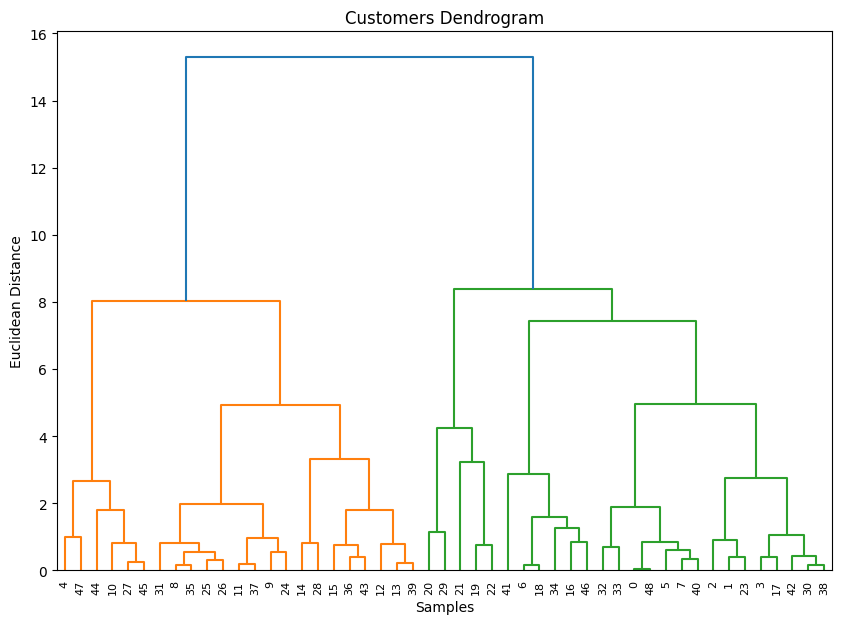

In [28]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Configurer la figure
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Sélectionner les données (ici les données PCA)
selected_data = X_pca

# Générer les clusters hiérarchiques
clusters = shc.linkage(selected_data, method='ward', metric="euclidean")

# Tracer le dendrogramme
shc.dendrogram(Z=clusters)

# Ajouter des labels aux axes
plt.xlabel("Samples")  # Exemple : identifier les échantillons
plt.ylabel("Euclidean Distance")  # Distance utilisée pour regrouper les clusters

# Afficher le graphique
plt.show()


1. Axes du graphique :
Axe X (Samples) : Les indices des échantillons (ou points de données). Chaque échantillon est un point individuel au bas de l’arbre.
Axe Y (Euclidean Distance) : La distance ou dissimilarité entre les groupes ou échantillons.
2. Regroupement des points :
L’arbre montre comment les échantillons (points de données) sont regroupés par étapes successives.
Les échantillons proches sont regroupés en fonction de la distance euclidienne.
Plus la distance (axe Y) entre deux groupes est petite, plus leurs points sont similaires.

### Determination de clusters :

Text(0, 0.5, 'Euclidean Distance')

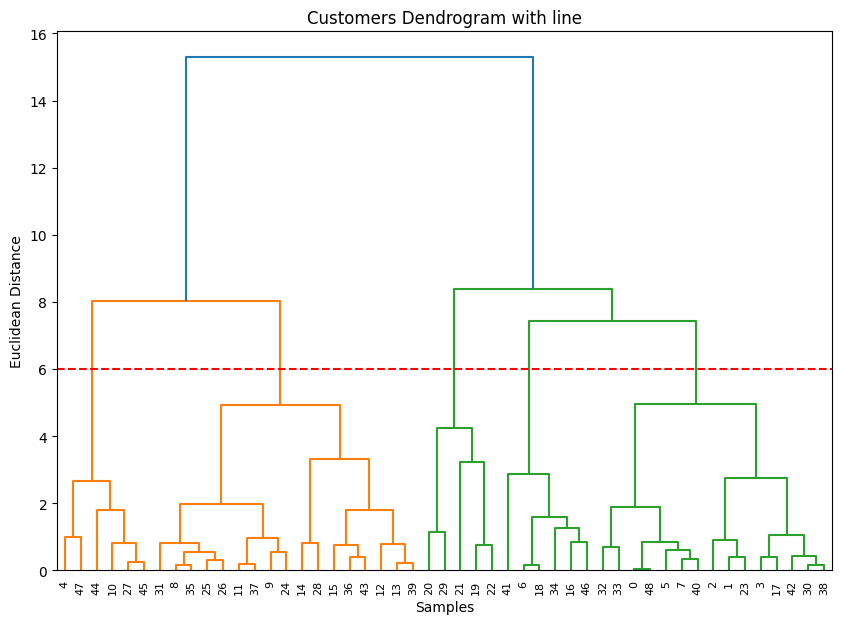

In [29]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 6, color = 'r', linestyle = '--')
plt.xlabel("Samples")  # Exemple : identifier les échantillons
plt.ylabel("Euclidean Distance")  # Distance utilisée pour regrouper les clusters


* Ligne rouge (seuil de coupe) :
  La ligne rouge horizontale indique le seuil fixé pour diviser les groupes.
  **Dans cet exemple :**
  La ligne rouge est à une distance d’environ 5.
  Tous les regroupements coupant cette ligne définissent des clusters (groupes indépendants).
* Clusters identifiés :
  Les deux couleurs principales (orange et vert) indiquent deux clusters principaux au seuil donné.
  Cluster 1 (orange) : Inclut des échantillons situés à gauche de l’arbre.
  Cluster 2 (vert) : Inclut les échantillons situés à droite.
* Interprétation générale :
  Les données présentent deux groupes principaux avec une certaine similarité interne.
  Si on abaissait la ligne rouge (seuil), davantage de petits clusters apparaîtraient. Inversement, en élevant la ligne rouge, on obtiendrait moins de clusters.


### Implémentation d'un clustering hiérarchique agglomératif :

In [30]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clustering_model.fit(selected_data)
print(clustering_model.labels_)


[0 0 0 0 3 0 4 0 1 1 3 1 1 1 1 1 4 0 4 2 2 2 2 0 1 1 1 3 1 2 0 1 0 0 4 1 1
 1 0 1 0 4 0 1 3 3 4 3 0]


La ligne imprimée représente les étiquettes de clusters attribuées à chaque point dans le jeu de données selected_data.
Chaque valeur correspond à l'étiquette d'un cluster (entre 0 et 4, car vous avez demandé 5 clusters).

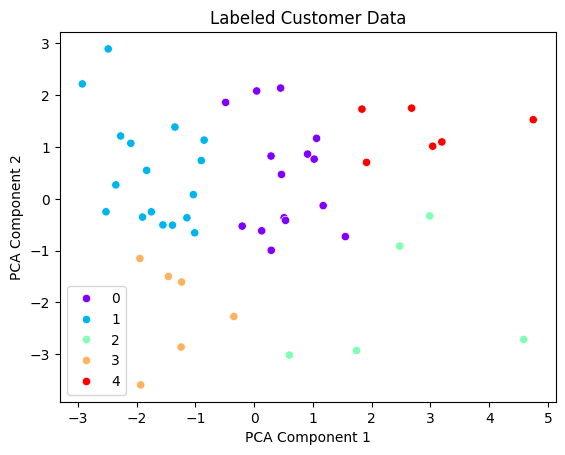

In [31]:
sns.scatterplot(
    x=X_pca[:, 0],  # Correctly specify the x-axis values
    y=X_pca[:, 1],  # Correctly specify the y-axis values
    hue=clustering_model.labels_,  # Use the cluster labels for color coding
    palette="rainbow"  # Choose the color palette for the clusters
).set_title('Labeled Customer Data')

plt.xlabel('PCA Component 1')  # Label for x-axis
plt.ylabel('PCA Component 2')  # Label for y-axis
plt.show()

* On observe une certaine séparation entre les clusters, notamment :

   Le cluster 4 (rouge) semble assez distinct, situé principalement dans la partie droite du graphique.
   Le cluster 0 (violet) est plus central, mais montre une certaine concentration.
   Les clusters 1 (cyan), 2 (vert clair) et 3 (beige) semblent plus proches les uns des autres, avec un certain chevauchement, ce qui suggère qu'ils pourraient être moins distincts en termes des deux premières composantes principales.